In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import palette
import squarify
from scipy import stats
import squarify

In [2]:
max_characters = 70
pd.set_option("display.max_colwidth", max_characters)

In [3]:
df_2012_13 = pd.read_csv('crime_2012_13.csv')
df_2013_14 = pd.read_csv('crime_2013_14.csv')
df_2014_15 = pd.read_csv('crime_2014_15.csv')
df_2015_16 = pd.read_csv('crime_2015_16.csv')
df_2016_17 = pd.read_csv('crime_2016_17.csv')
df_2017_18 = pd.read_csv('crime_2017_18.csv')
df_2018_19 = pd.read_csv('crime_2018_19.csv')
df_2019_20 = pd.read_csv('crime_2019_20.csv')
#df_2020_21 = pd.read_csv('crime_2020_21.csv') removing as only 1 quarter

In [4]:
df_2012_13['Force Name'] = df_2012_13['Force Name'].str.replace('&', ('and'))
df_2013_14['Force Name'] = df_2013_14['Force Name'].str.replace('&', ('and'))
df_2014_15['Force Name'] = df_2014_15['Force Name'].str.replace('&', ('and'))
df_2015_16['Force Name'] = df_2015_16['Force Name'].str.replace('&', ('and'))
df_2016_17['Force Name'] = df_2016_17['Force Name'].str.replace('&', ('and'))
df_2017_18['Force Name'] = df_2017_18['Force Name'].str.replace('&', ('and'))
df_2018_19['Force Name'] = df_2018_19['Force Name'].str.replace('&', ('and'))
df_2019_20['Force Name'] = df_2019_20['Force Name'].str.replace('&', ('and'))

In [5]:
df = pd.concat([df_2012_13, df_2013_14, df_2014_15, df_2015_16, df_2016_17, df_2017_18, df_2018_19, df_2019_20], ignore_index=True)

In [6]:
df

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Offence Count
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323.0
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0.0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes,Miscellaneous crimes,80,1.0
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and pornography,Sexual offences,Other sexual offences,71,0.0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3.0
...,...,...,...,...,...,...,...,...
442483,2019/20,4,Wiltshire,Violent disorder,Public order offences,Public order offences,62A,27.0
442484,2019/20,4,Wiltshire,Violent disorder,Public order offences,Public order offences,62A,29.0
442485,2019/20,4,Wiltshire,Wildlife,Miscellaneous crimes,Miscellaneous crimes,96,0.0
442486,2019/20,4,Wiltshire,Wildlife,Miscellaneous crimes,Miscellaneous crimes,96,0.0


In [7]:
df['Force Name'].unique()

array(['Action Fraud', 'Avon and Somerset', 'Bedfordshire',
       'British Transport Police', 'Cambridgeshire', 'Cheshire', 'CIFAS',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon and Cornwall',
       'Dorset', 'Durham', 'Dyfed-Powys', 'Essex',
       'Financial Fraud Action UK', 'Gloucestershire',
       'Greater Manchester', 'Gwent', 'Hampshire', 'Hertfordshire',
       'Humberside', 'Kent', 'Lancashire', 'Leicestershire',
       'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'UK Finance'],
      dtype=object)

In [8]:
df['Offence Group'].unique()

array(['Fraud offences', 'Violence against the person',
       'Miscellaneous crimes', 'Sexual offences', 'Theft offences',
       'Criminal damage and arson', 'Drug offences',
       'Possession of weapons offences', 'Public order offences',
       'Robbery'], dtype=object)

In [9]:
df.shape

(442488, 8)

In [10]:
df.dtypes

Financial Year          object
Financial Quarter        int64
Force Name              object
Offence Description     object
Offence Group           object
Offence Subgroup        object
Offence Code            object
Offence Count          float64
dtype: object

In [11]:
df.describe()

,Financial Quarter,Offence Count
count,442488.000000,442488.000000
mean,2.500000,88.871852
std,1.118035,901.932228
min,1.000000,-449.000000
25%,1.750000,0.000000
50%,2.500000,3.000000
75%,3.250000,29.000000
max,4.000000,89239.000000


In [12]:
df.isnull().sum()

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Offence Count          0
dtype: int64

In [13]:
for i in df.columns:
    print("Number of unique values in {} \n The unique values are {}".format(i,len(df[i].unique()),df[i].unique))
    print("-----------------------------------------")

Number of unique values in Financial Year 
 The unique values are 8
-----------------------------------------
Number of unique values in Financial Quarter 
 The unique values are 4
-----------------------------------------
Number of unique values in Force Name 
 The unique values are 48
-----------------------------------------
Number of unique values in Offence Description 
 The unique values are 191
-----------------------------------------
Number of unique values in Offence Group 
 The unique values are 10
-----------------------------------------
Number of unique values in Offence Subgroup 
 The unique values are 33
-----------------------------------------
Number of unique values in Offence Code 
 The unique values are 177
-----------------------------------------
Number of unique values in Offence Count 
 The unique values are 3546
-----------------------------------------


In [14]:
df.to_csv('full.csv')

In [15]:
df['Offence Count'].astype(int)

0         20323
1             0
2             1
3             0
4             3
          ...  
442483       27
442484       29
442485        0
442486        0
442487        0
Name: Offence Count, Length: 442488, dtype: int64

In [16]:
total_offence_count = df['Offence Count'].sum()

In [17]:
print("The total number of Offences from FY 12/13 to FY 19/20 is" + " " + total_offence_count.astype(str))

The total number of Offences from FY 12/13 to FY 19/20 is 39324728.0


In [18]:
avg_offences_year = total_offence_count / 8

In [19]:
print("The avaerage number of offences per year is " + avg_offences_year.astype(str))

The avaerage number of offences per year is 4915591.0


In [20]:
#Assigning year total variables

off_tot_2012_13 = df.loc[df['Financial Year'] == '2012/13', 'Offence Count'].sum()
off_tot_2013_14 = df.loc[df['Financial Year'] == '2013/14', 'Offence Count'].sum()
off_tot_2014_15 = df.loc[df['Financial Year'] == '2014/15', 'Offence Count'].sum()
off_tot_2015_16 = df.loc[df['Financial Year'] == '2015/16', 'Offence Count'].sum()
off_tot_2016_17 = df.loc[df['Financial Year'] == '2016/17', 'Offence Count'].sum()
off_tot_2017_18 = df.loc[df['Financial Year'] == '2017/18', 'Offence Count'].sum()
off_tot_2018_19 = df.loc[df['Financial Year'] == '2018/19', 'Offence Count'].sum()
off_tot_2019_20 = df.loc[df['Financial Year'] == '2019/20', 'Offence Count'].sum()

In [21]:
off_tot_2019_20

6080617.0

In [22]:
off_tot_2012_13_q1 = df_2012_13.loc[df_2012_13['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2012_13_q2 = df_2012_13.loc[df_2012_13['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2012_13_q3 = df_2012_13.loc[df_2012_13['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2012_13_q4 = df_2012_13.loc[df_2012_13['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2013_14_q1 = df_2013_14.loc[df_2013_14['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2013_14_q2 = df_2013_14.loc[df_2013_14['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2013_14_q3 = df_2013_14.loc[df_2013_14['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2013_14_q4 = df_2013_14.loc[df_2013_14['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2014_15_q1 = df_2014_15.loc[df_2014_15['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2014_15_q2 = df_2014_15.loc[df_2014_15['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2014_15_q3 = df_2014_15.loc[df_2014_15['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2014_15_q4 = df_2014_15.loc[df_2014_15['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2015_16_q1 = df_2015_16.loc[df_2015_16['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2015_16_q2 = df_2015_16.loc[df_2015_16['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2015_16_q3 = df_2015_16.loc[df_2015_16['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2015_16_q4 = df_2015_16.loc[df_2015_16['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2016_17_q1 = df_2016_17.loc[df_2016_17['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2016_17_q2 = df_2016_17.loc[df_2016_17['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2016_17_q3 = df_2016_17.loc[df_2016_17['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2016_17_q4 = df_2016_17.loc[df_2016_17['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2017_18_q1 = df_2017_18.loc[df_2017_18['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2017_18_q2 = df_2017_18.loc[df_2017_18['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2017_18_q3 = df_2017_18.loc[df_2017_18['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2017_18_q4 = df_2017_18.loc[df_2017_18['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2018_19_q1 = df_2018_19.loc[df_2018_19['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2018_19_q2 = df_2018_19.loc[df_2018_19['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2018_19_q3 = df_2018_19.loc[df_2018_19['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2018_19_q4 = df_2018_19.loc[df_2018_19['Financial Quarter'] == 4, 'Offence Count'].sum()

off_tot_2019_20_q1 = df_2019_20.loc[df_2019_20['Financial Quarter'] == 1, 'Offence Count'].sum()
off_tot_2019_20_q2 = df_2019_20.loc[df_2019_20['Financial Quarter'] == 2, 'Offence Count'].sum()
off_tot_2019_20_q3 = df_2019_20.loc[df_2019_20['Financial Quarter'] == 3, 'Offence Count'].sum()
off_tot_2019_20_q4 = df_2019_20.loc[df_2019_20['Financial Quarter'] == 4, 'Offence Count'].sum()

In [23]:
print('2012/13')
print(off_tot_2012_13_q1)
print(off_tot_2012_13_q2)
print(off_tot_2012_13_q3)
print(off_tot_2012_13_q4)
print('------------------')
print('2013/14')
print(off_tot_2013_14_q1)
print(off_tot_2013_14_q2)
print(off_tot_2013_14_q3)
print(off_tot_2013_14_q4)
print('------------------')
print('2014/15')
print(off_tot_2014_15_q1)
print(off_tot_2014_15_q2)
print(off_tot_2014_15_q3)
print(off_tot_2014_15_q4)
print('------------------')
print('2015/16')
print(off_tot_2015_16_q1)
print(off_tot_2015_16_q2)
print(off_tot_2015_16_q3)
print(off_tot_2015_16_q4)
print('------------------')
print('2016/17')
print(off_tot_2016_17_q1)
print(off_tot_2016_17_q2)
print(off_tot_2016_17_q3)
print(off_tot_2016_17_q4)
print('------------------')
print('2017/18')
print(off_tot_2017_18_q1)
print(off_tot_2017_18_q2)
print(off_tot_2017_18_q3)
print(off_tot_2017_18_q4)
print('------------------')
print('2018/19')
print(off_tot_2018_19_q1)
print(off_tot_2018_19_q2)
print(off_tot_2018_19_q3)
print(off_tot_2018_19_q4)
print('------------------')
print('2019/20')
print(off_tot_2019_20_q1)
print(off_tot_2019_20_q2)
print(off_tot_2019_20_q3)
print(off_tot_2019_20_q4)
print('------------------')

2012/13
1030153
1045220
1022824
965374
------------------
2013/14
1007690
1026524
1001503
992739
------------------
2014/15
1035520.0
1056749.0
1052072.0
1023278.0
------------------
2015/16
1124774.0
1129939.0
1147401.0
1113694.0
------------------
2016/17
1191651.0
1230602.0
1278520.0
1275473.0
------------------
2017/18
1382073.0
1406171.0
1394044.0
1347602.0
------------------
2018/19
1480898.0
1514115.0
1492418.0
1475090.0
------------------
2019/20
1533776.0
1564224.0
1517542.0
1465075.0
------------------


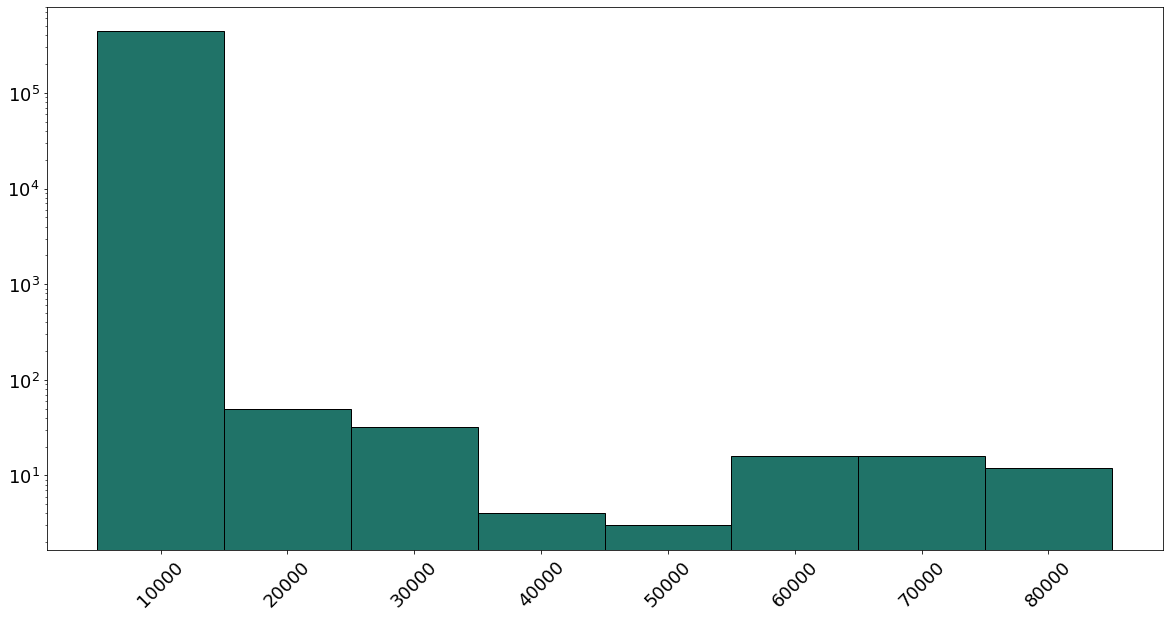

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.hist(df['Offence Count'], bins= [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], log=True, align='right', edgecolor='black', color='#207368')
kde = stats.gaussian_kde(df['Offence Count'])
#ax.set_ylabel('Frequancy', fontsize=18)
#ax.set_xlabel('Offence Count', fontsize=18)
#ax.set_title('Offence Count Histogram', fontsize=13)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xticks(rotation = 45)

plt.show()

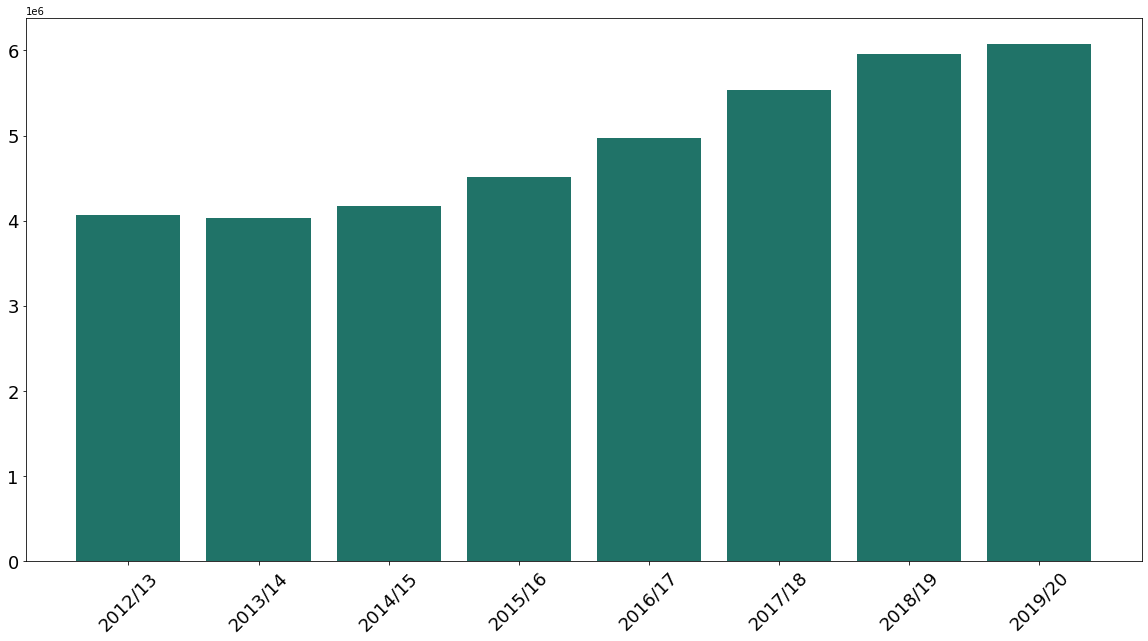

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

fys = ["2012/13", "2013/14", "2014/15", "2015/16", "2016/17", "2017/18", "2018/19", "2019/20"]
counts = [off_tot_2012_13, off_tot_2013_14, off_tot_2014_15, off_tot_2015_16, off_tot_2016_17, off_tot_2017_18, off_tot_2018_19, off_tot_2019_20]
ax.bar(fys, counts, color='#207368')

#ax.set_ylabel('Offence Count (Millions)')
#ax.set_xlabel('Year')
#ax.set_title('Offence Count through the financial years')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xticks(rotation = 45)

plt.show()

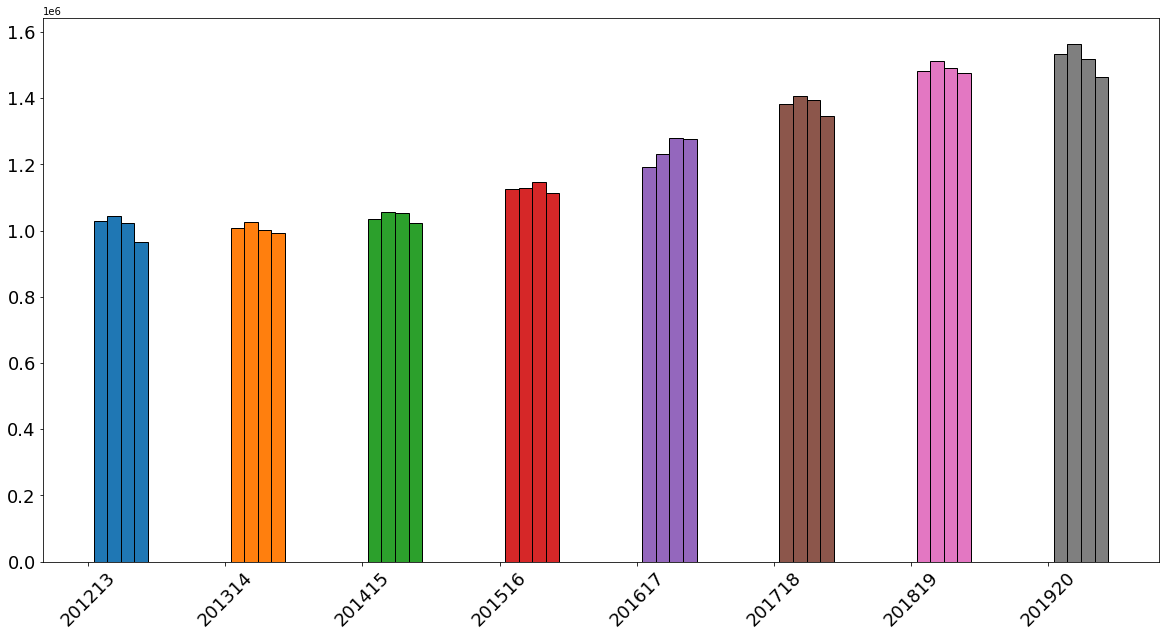

In [26]:
crime_qs = {
    2012_13: [off_tot_2012_13_q1, off_tot_2012_13_q2, off_tot_2012_13_q3, off_tot_2012_13_q4],
    2013_14: [off_tot_2013_14_q1, off_tot_2013_14_q2, off_tot_2013_14_q3, off_tot_2013_14_q4],
    2014_15: [off_tot_2014_15_q1, off_tot_2014_15_q2, off_tot_2014_15_q3, off_tot_2014_15_q4],
    2015_16: [off_tot_2015_16_q1, off_tot_2015_16_q2, off_tot_2015_16_q3, off_tot_2015_16_q4],
    2016_17: [off_tot_2016_17_q1, off_tot_2016_17_q2, off_tot_2016_17_q3, off_tot_2016_17_q4],
    2017_18: [off_tot_2017_18_q1, off_tot_2017_18_q2, off_tot_2017_18_q3, off_tot_2017_18_q4],
    2018_19: [off_tot_2018_19_q1, off_tot_2018_19_q2, off_tot_2018_19_q3, off_tot_2018_19_q4],
    2019_20: [off_tot_2019_20_q1, off_tot_2019_20_q2, off_tot_2019_20_q3, off_tot_2019_20_q4],
    }

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 45)

for year, data in crime_qs.items():
    x_coordinates = [year + 10 * q for q in [1,2,3,4]]
    plt.bar(x_coordinates,data,width=10,edgecolor='black')

years = crime_qs.keys()
plt.xticks([year + 1 for year in years], years)

#plt.title('Crime Offences per Year, split by quarter')
#plt.ylabel('Offence Count (millions)')
#plt.xlabel('Years')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

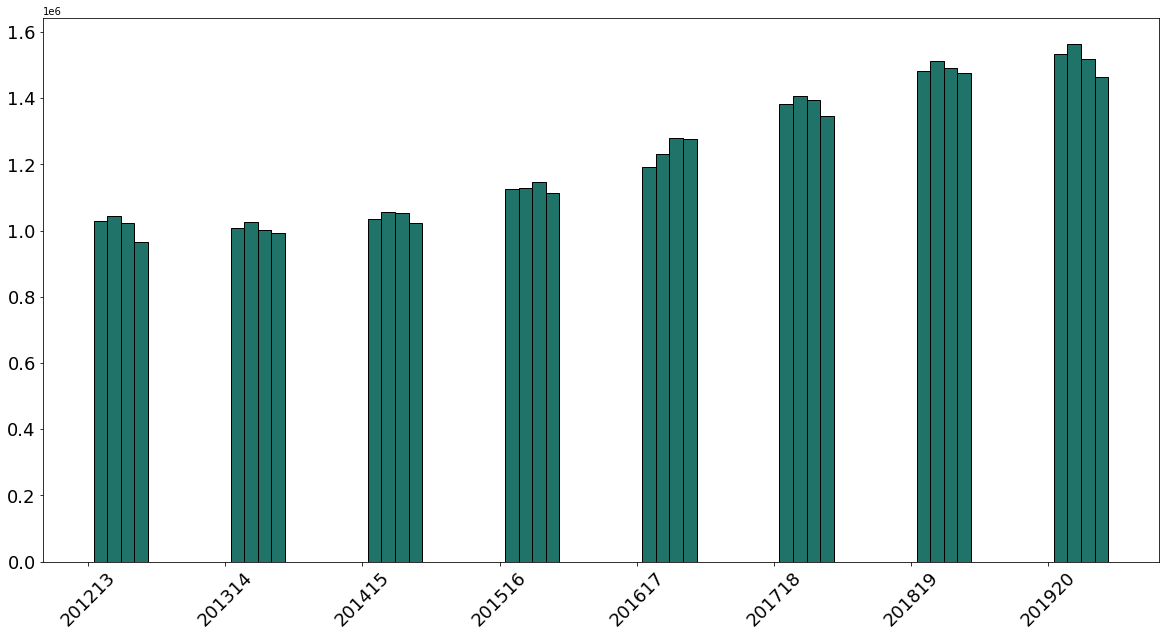

In [27]:
crime_qs = {
    2012_13: [off_tot_2012_13_q1, off_tot_2012_13_q2, off_tot_2012_13_q3, off_tot_2012_13_q4],
    2013_14: [off_tot_2013_14_q1, off_tot_2013_14_q2, off_tot_2013_14_q3, off_tot_2013_14_q4],
    2014_15: [off_tot_2014_15_q1, off_tot_2014_15_q2, off_tot_2014_15_q3, off_tot_2014_15_q4],
    2015_16: [off_tot_2015_16_q1, off_tot_2015_16_q2, off_tot_2015_16_q3, off_tot_2015_16_q4],
    2016_17: [off_tot_2016_17_q1, off_tot_2016_17_q2, off_tot_2016_17_q3, off_tot_2016_17_q4],
    2017_18: [off_tot_2017_18_q1, off_tot_2017_18_q2, off_tot_2017_18_q3, off_tot_2017_18_q4],
    2018_19: [off_tot_2018_19_q1, off_tot_2018_19_q2, off_tot_2018_19_q3, off_tot_2018_19_q4],
    2019_20: [off_tot_2019_20_q1, off_tot_2019_20_q2, off_tot_2019_20_q3, off_tot_2019_20_q4],
    }

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 45)

for year, data in crime_qs.items():
    x_coordinates = [year + 10 * q for q in [1,2,3,4]]
    plt.bar(x_coordinates,data,width=10,edgecolor='black', color = '#207368')

years = crime_qs.keys()
plt.xticks([year + 1 for year in years], years)

#plt.title('Crime Offences per Year, split by quarter')
#plt.ylabel('Offence Count (millions)')
#plt.xlabel('Years')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

In [28]:
df.head(5)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Offence Count
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323.0
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0.0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes,Miscellaneous crimes,80,1.0
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and pornography,Sexual offences,Other sexual offences,71,0.0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3.0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

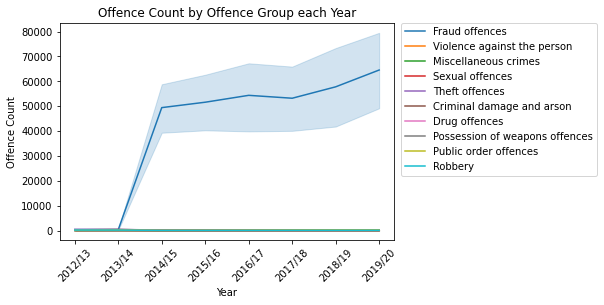

In [29]:
sns.lineplot(x='Financial Year', y='Offence Count', data = df, hue='Offence Group').set(title='Offence Count by Offence Group each Year', xlabel='Year', ylabel='Offence Count')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45)

In [30]:
df_monthly = df.groupby(['Financial Year', 'Offence Group']).sum()
df_monthly = df_monthly[['Offence Count']].reset_index()
#df_monthly.drop(df_monthly[df_monthly['Offence Group'] == 'Fraud offences'].index, inplace = True)

df_monthly.to_csv('df_monthly.csv')

In [31]:
df_monthly.head(10)

,Financial Year,Offence Group,Offence Count
0,2012/13,Criminal damage and arson,529712.0
1,2012/13,Drug offences,208003.0
2,2012/13,Fraud offences,510403.0
3,2012/13,Miscellaneous crimes,42499.0
4,2012/13,Possession of weapons offences,19910.0
5,2012/13,Public order offences,132205.0
6,2012/13,Robbery,65155.0
7,2012/13,Sexual offences,53599.0
8,2012/13,Theft offences,1900944.0
9,2012/13,Violence against the person,601141.0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

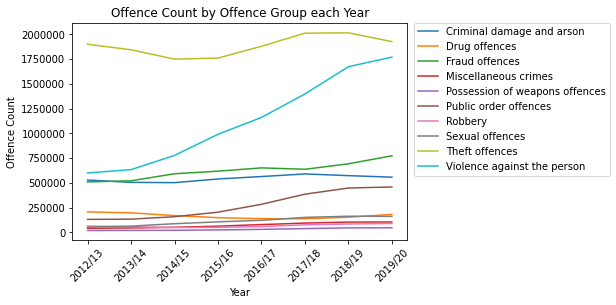

In [32]:
sns.lineplot(x='Financial Year', y='Offence Count', data=df_monthly, hue='Offence Group').set(title='Offence Count by Offence Group each Year', xlabel='Year', ylabel='Offence Count')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45)

In [33]:
fraud_only = df.groupby(['Financial Year', 'Offence Group']).sum()
fraud_only = fraud_only[['Offence Count']].reset_index()
fraud_only.drop(fraud_only[fraud_only['Offence Group'] != 'Fraud offences'].index, inplace = True)

fraud_only.to_csv('fraud.csv')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

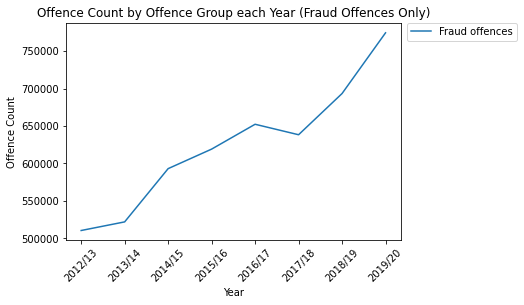

In [34]:
sns.lineplot(x='Financial Year', y='Offence Count', data=fraud_only, hue='Offence Group').set(title='Offence Count by Offence Group each Year (Fraud Offences Only)', xlabel='Year', ylabel='Offence Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45)

In [35]:
df.describe()

,Financial Quarter,Offence Count
count,442488.000000,442488.000000
mean,2.500000,88.871852
std,1.118035,901.932228
min,1.000000,-449.000000
25%,1.750000,0.000000
50%,2.500000,3.000000
75%,3.250000,29.000000
max,4.000000,89239.000000


In [36]:
df.loc[df['Force Name'] == 'UK Finance', 'Offence Count'].sum()

230516.0

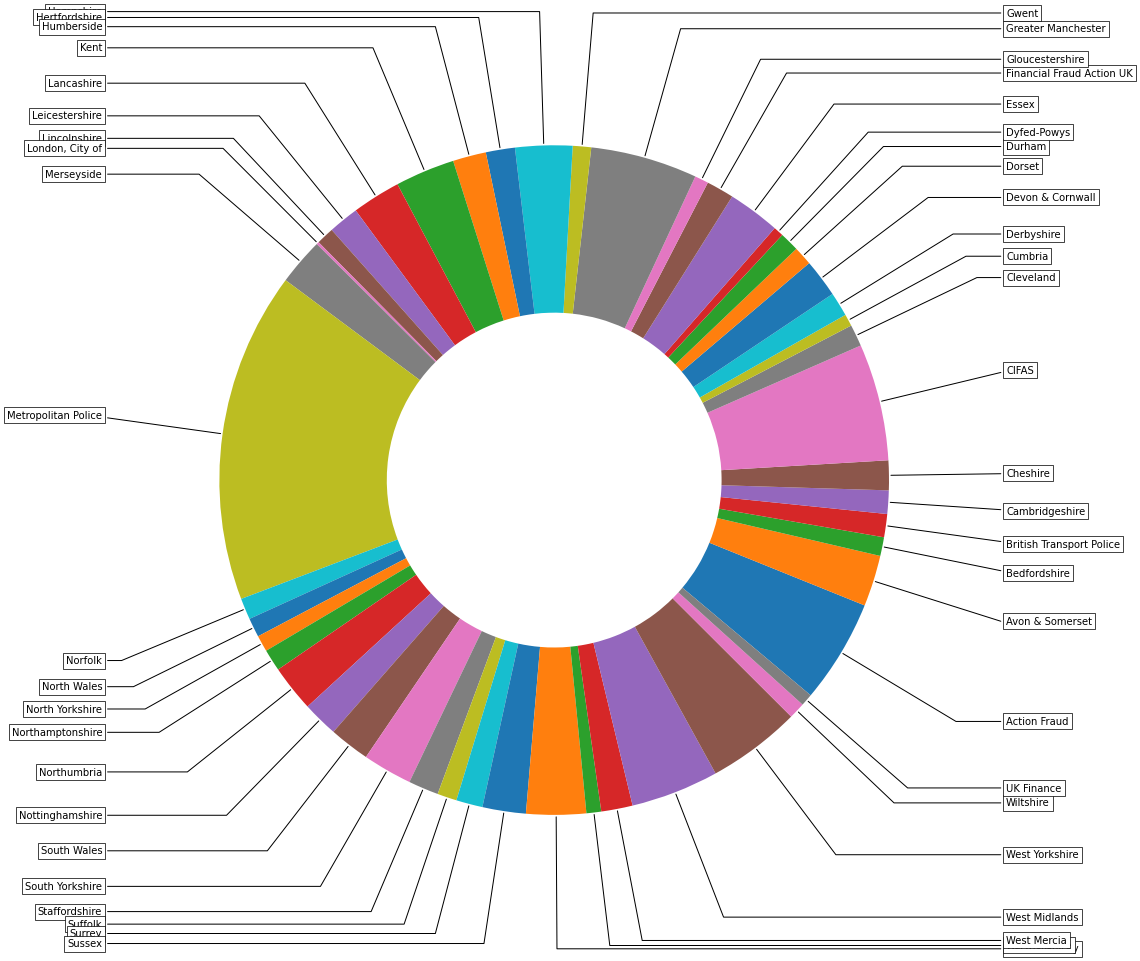

In [37]:
labels = ['Action Fraud', 'Avon & Somerset', 'Bedfordshire', 'British Transport Police', 'Cambridgeshire', 'Cheshire', 'CIFAS',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon & Cornwall', 'Dorset',
       'Durham', 'Dyfed-Powys', 'Essex', 'Financial Fraud Action UK',
       'Gloucestershire', 'Greater Manchester', 'Gwent', 'Hampshire',
       'Hertfordshire', 'Humberside', 'Kent', 'Lancashire',
       'Leicestershire', 'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'UK Finance']

sizes = [1967901, 971205, 355008, 439710, 443366, 562913, 2218919, 413390, 226858, 459106, 723261, 359573, 368570, 191027, 991611, 523390, 261537, 2027904, 348741, 1082646, 552236, 630885, 1130448,
              921606, 578826, 335410, 48736, 892496, 6275790, 404045, 362820, 310147, 415986, 884128, 676677, 769151, 939141, 573411, 369318, 502217, 823327, 1133547, 280465, 595692, 1668149,
              1773591, 309331, 230516]

fig, ax = plt.subplots(figsize=(15, 20), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40,)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Offence Count Percentage by Force", loc='center')

plt.show()

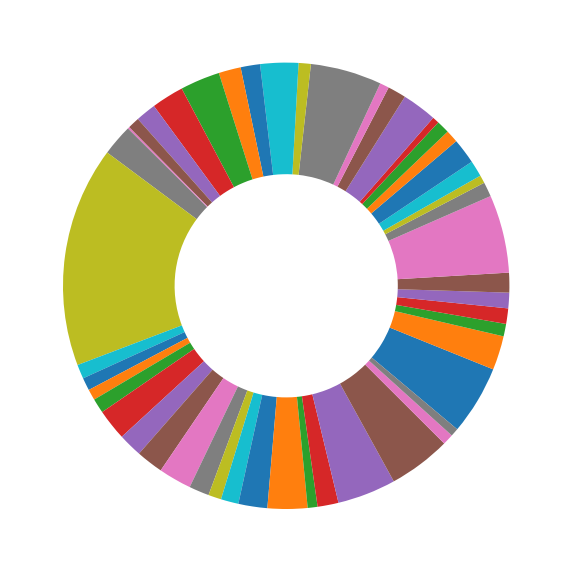

In [38]:
labels = ['Action Fraud', 'Avon & Somerset', 'Bedfordshire', 'British Transport Police', 'Cambridgeshire', 'Cheshire', 'CIFAS',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon & Cornwall', 'Dorset',
       'Durham', 'Dyfed-Powys', 'Essex', 'Financial Fraud Action UK',
       'Gloucestershire', 'Greater Manchester', 'Gwent', 'Hampshire',
       'Hertfordshire', 'Humberside', 'Kent', 'Lancashire',
       'Leicestershire', 'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'UK Finance']

sizes = [1967901, 971205, 355008, 439710, 443366, 562913, 2218919, 413390, 226858, 459106, 723261, 359573, 368570, 191027, 991611, 523390, 261537, 2027904, 348741, 1082646, 552236, 630885, 1130448,
              921606, 578826, 335410, 48736, 892496, 6275790, 404045, 362820, 310147, 415986, 884128, 676677, 769151, 939141, 573411, 369318, 502217, 823327, 1133547, 280465, 595692, 1668149,
              1773591, 309331, 230516]

fig, ax = plt.subplots(figsize=(10, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40,)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

plt.show()

In [39]:
a = df.loc[df['Offence Group'] == 'Fraud offences', 'Offence Count'].sum()
b = df.loc[df['Offence Group'] == 'Violence against the person', 'Offence Count'].sum()
d = df.loc[df['Offence Group'] == 'Sexual offences', 'Offence Count'].sum()
e = df.loc[df['Offence Group'] == 'Theft offences', 'Offence Count'].sum()
f = df.loc[df['Offence Group'] == 'Criminal damage and arson', 'Offence Count'].sum()
g = df.loc[df['Offence Group'] == 'Drug offences', 'Offence Count'].sum()
h = df.loc[df['Offence Group'] == 'Possession of weapons offences', 'Offence Count'].sum()
i = df.loc[df['Offence Group'] == 'Public order offences', 'Offence Count'].sum()
j = df.loc[df['Offence Group'] == 'Robbery', 'Offence Count'].sum()
k = df.loc[df['Offence Group'] == 'Miscellaneous crimes', 'Offence Count'].sum()

print(e)
print(sum(sizes))

15095546.0
39324728


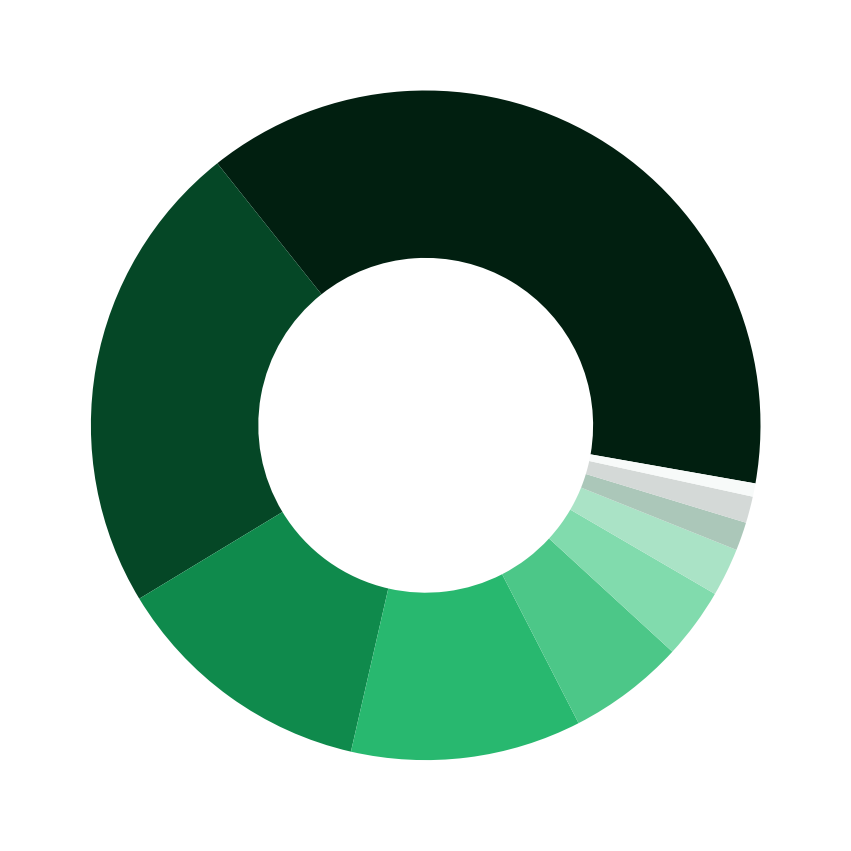

In [40]:
labels = ['Theft offences', 'Violence against the person', 'Fraud offences', 'Criminal damage and arson', 'Public order offences',
          'Drug offences', 'Sexual offences', 'Miscellaneous crimes', 'Robbery', 'Possession of weapons offences']
sizes = [15095546, 9012201, 5003215, 4367743, 2210926, 1340693, 915638, 536983, 501504, 252340]

color = ['#011f10', '#054726', '#0f8a4c', '#28b86f', '#4cc788', '#81dbad', '#aae3c6', '#abc7b9', '#d4d9d7', '#f7faf9']

fig, ax = plt.subplots(figsize=(15, 20), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-10, colors=color)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

#ax.set_title("Offence Count Percentage by Force", loc='center')

plt.show()

In [41]:
force_names = df.groupby(['Force Name']).sum()
force_names = force_names[['Offence Count']].reset_index()

force_names.to_csv('force_name.csv')

In [42]:
force_names.dtypes

Force Name        object
Offence Count    float64
dtype: object

In [43]:
force_names

,Force Name,Offence Count
0,Action Fraud,1967901.0
1,Avon and Somerset,971205.0
2,Bedfordshire,355008.0
3,British Transport Police,439710.0
4,CIFAS,2218919.0
5,Cambridgeshire,443366.0
6,Cheshire,562913.0
7,Cleveland,413390.0
8,Cumbria,226858.0
9,Derbyshire,459106.0


In [44]:
force_names['Force Name'] = force_names['Force Name'].astype('str')

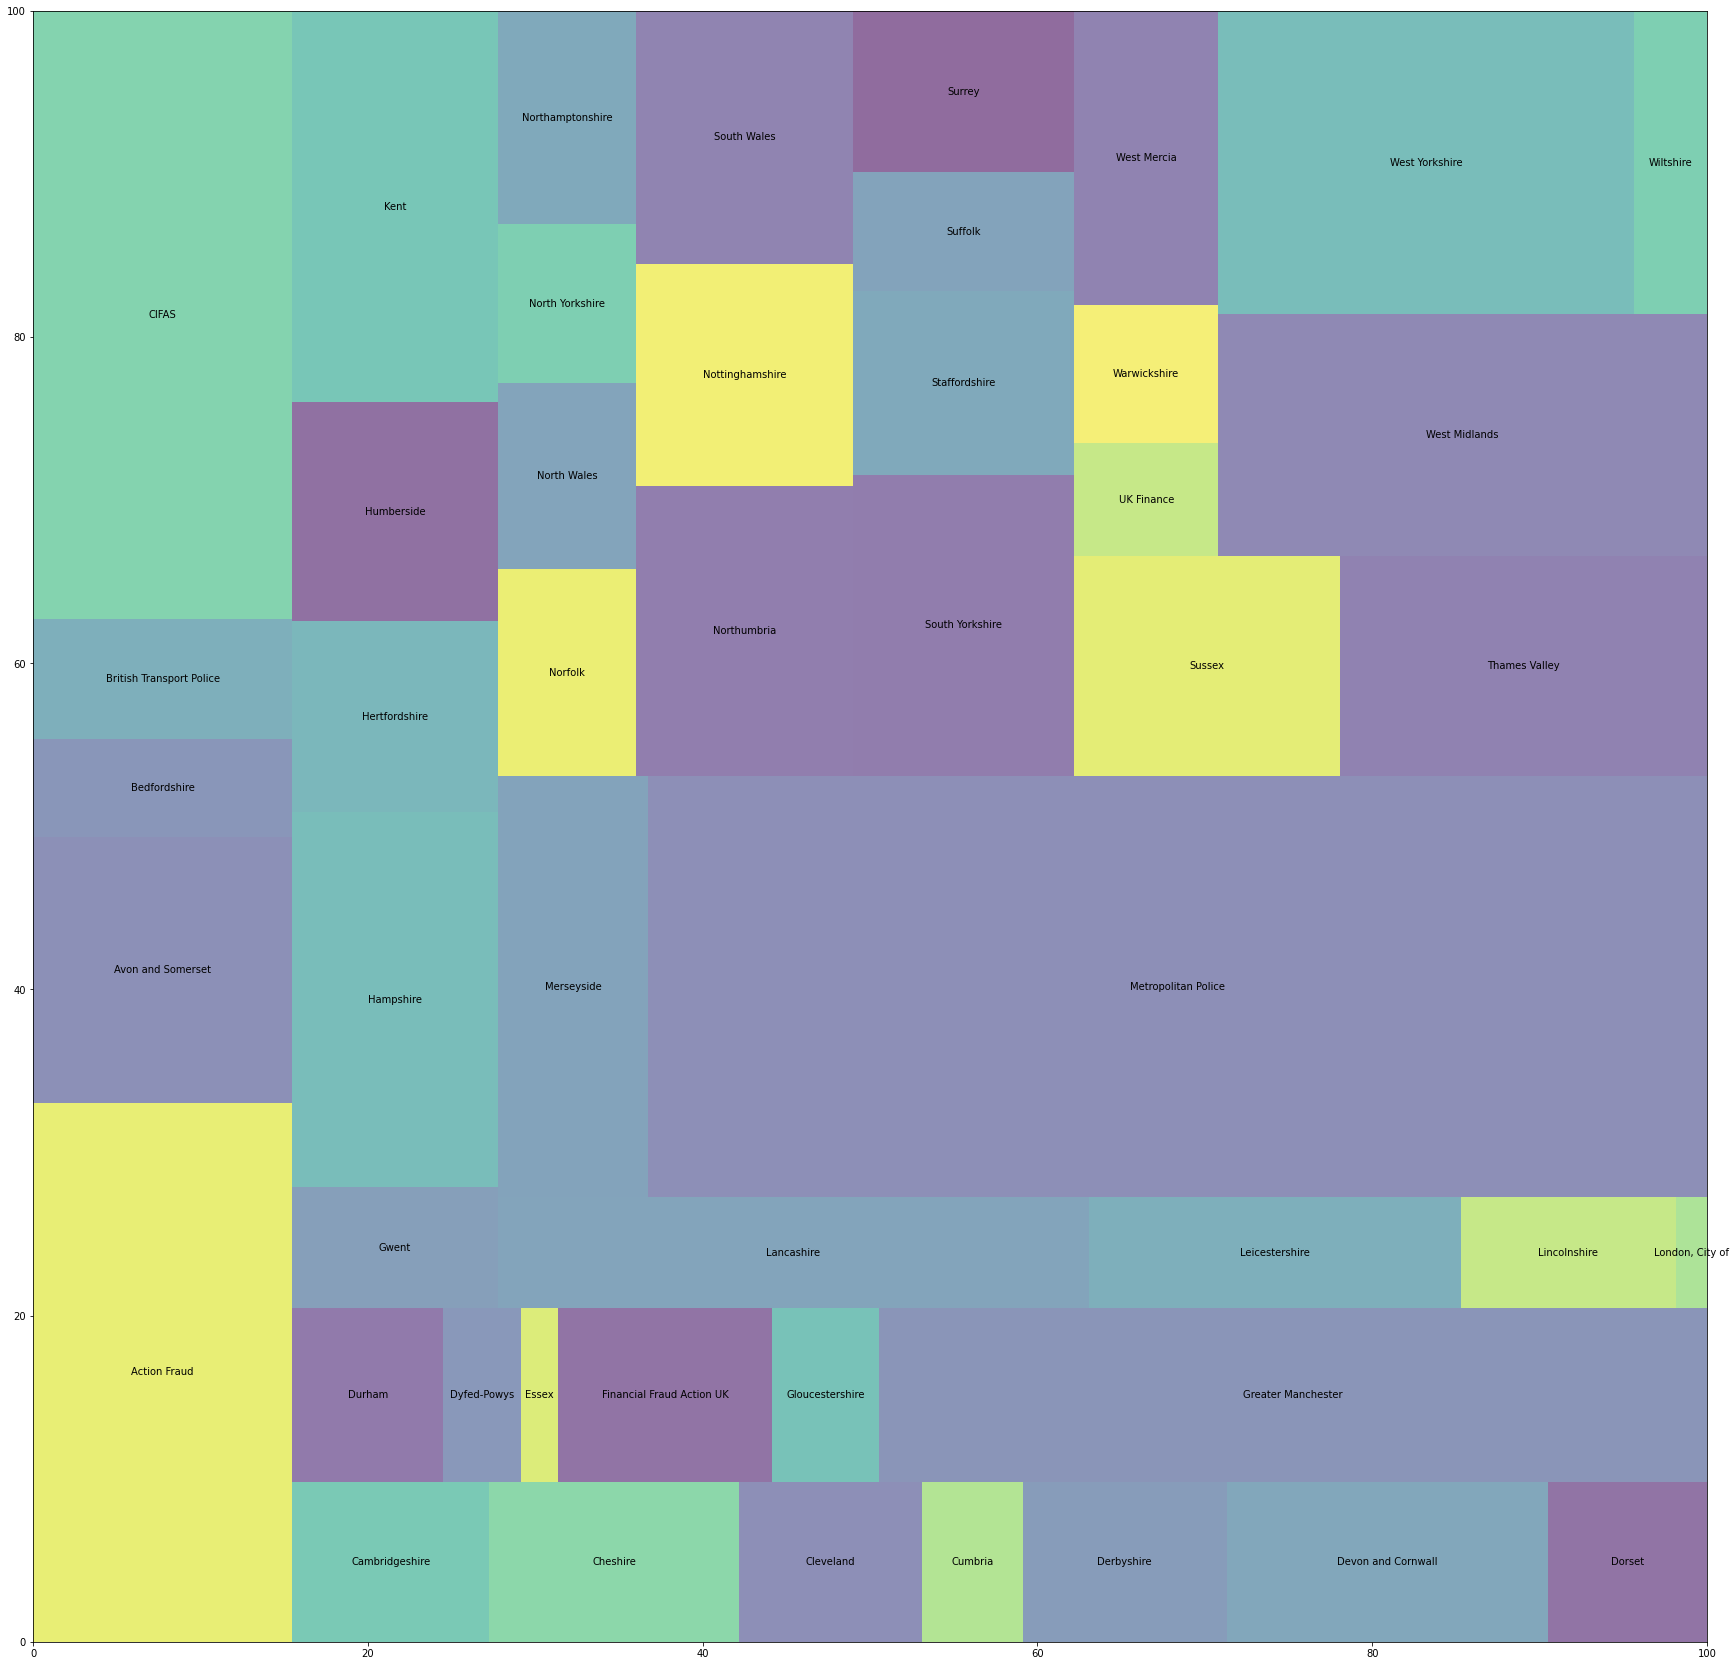

In [45]:
sizes = [1967901, 971205, 355008, 439710, 2218919, 443366, 562913, 413390, 226858, 459106, 723261, 359573, 368570,
         191027, 91611, 523390, 261537, 2027904, 348741, 1082646, 552236, 630885, 1130448, 921606, 578826, 335410, 48736, 892496,
         6275790, 404045, 362820, 310147, 415986, 884128, 676677, 769151, 939141, 573411, 369318, 502217, 823327, 1133547, 230516,
         280465, 595692, 1668149, 1773591, 309331]

labels = ['Action Fraud', 'Avon and Somerset', 'Bedfordshire', 'British Transport Police', 'CIFAS', 'Cambridgeshire', 'Cheshire',
          'Cleveland', 'Cumbria', 'Derbyshire', 'Devon and Cornwall', 'Dorset', 'Durham', 'Dyfed-Powys', 'Essex', 'Financial Fraud Action UK',
        'Gloucestershire', 'Greater Manchester', 'Gwent','Hampshire', 'Hertfordshire', 'Humberside', 'Kent', 'Lancashire', 'Leicestershire',
        'Lincolnshire', 'London, City of', 'Merseyside', 'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire', 'Northamptonshire',
        'Northumbria', 'Nottinghamshire', 'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk', 'Surrey', 'Sussex', 'Thames Valley',
        'UK Finance', 'Warwickshire', 'West Mercia', 'West Midlands', 'West Yorkshire', 'Wiltshire']

squarify.plot(sizes=sizes, label=labels, alpha=0.6)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(30,30)
plt.axis('off')
plt.show()

In [46]:
maps = df.groupby(['Force Name']).sum()
maps = maps[['Offence Count']].reset_index()
maps.to_csv('maps.csv')
maps.head()

,Force Name,Offence Count
0,Action Fraud,1967901.0
1,Avon and Somerset,971205.0
2,Bedfordshire,355008.0
3,British Transport Police,439710.0
4,CIFAS,2218919.0


In [47]:
import plotly.express as px
import pandas as pd

#px.set_mapbox_access_token(open(".mapbox_token").read())
maps = pd.read_csv('maps.csv')
fig = px.scatter_mapbox(maps,
                        lon='long',
                        lat='lat',
                        zoom=6,
                        color=df['Force Name'],
                        size=df['Offence Count'],
                        width=1300,
                        height=1000,
                        size_max=50,
                        title='Scatter Map showing distribution of offence count by Force Name')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'Force Name', 'Offence Count'] but received: lat